# Task 1: Permutations and Combinations

This task analyses the Lady Tasting Tea experiment using Python to calculate the probability of a person correctly guessing which cups had milk first under different scenarios, assuming no special powers. It explores probabilities for perfect guesses, at most one error, and evaluates the acceptance of two errors, with justifications provided in code and Markdown.

#### Task description
Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

In [ ]:
# Import dependencies ------
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math
# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools
# Random selections.
# https://docs.python.org/3/library/random.html
import random
# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np
# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

In [ ]:
# set variables ----------

# Number of cups of tea in total.
no_cups = 12 #k
# Number of cups of tea with milk in first.
no_cups_milk_first = 6 #n
# Number of cups of tea with tea in first.
no_cups_tea_first = 6 #n-k

The total number of possible combinations is calculated with combination formula (binomial coefficient )or the number of ways to choose 𝑘 items from a set of 𝑛 items, where order does not matter:
>$\binom{n}{k} = \frac{n!}{k!(n-k)!}$

- 𝑛! is the factorial of 𝑛, the total number of items.
- 𝑘! is the factorial of 𝑘, the number of items you're choosing.
- (𝑛−𝑘)! is the factorial of the remaining items.


In [2]:
# evaluation the choose formula (ref: lecture notes)
n,k = no_cups, no_cups_milk_first #assigning variables
choose = math.factorial(n)/(math.factorial(k)*(math.factorial(n-k)))
choose


924.0

In [3]:
# math.comb function does the same thing. (ref: lecture notes)
ways = math.comb(no_cups, no_cups_milk_first)
# Show.
ways

924

In [4]:
# we can show all possible combinations the 6 cups can be chosen
    # with list(itertools.combinations()function) 
# (ref: lecture notes)

# Create The cup labels.
labels = list(range(n)) #create a list containing integers from 0 to 7 to represent the cups
print("teacup labels: ", labels)
# Show the different ways (combinations) of selecting no_cups_milk_first out of no_cups cups of tea.
combinations = list(itertools.combinations(labels, k))
# Show.
combs=combinations
print("count combinations: ",len(combs))
#combs

teacup labels:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
count combinations:  924


Now we have 3 different ways of proving that there are 924 possible combinations of chosing 6 items out of 12.
$$\binom{n}{k} = \frac{n!}{k!(n-k)!} $$
$$\binom{12}{6} = \frac{12!}{6!(12-6)!} = 924$$


##### *Probability*
In this case, choosing the 6 correct cups from 12 is a mutually exclusive scenario where the lady either gets it all right or not. There are 924 different ways to choose 6 cups from 12 and only 1 way to get it right when all 6 selected cups are milk-in-first cups. Therefore, she has a 1 in 924 (or 0.11%) chance of succeeding. 
$$ P= \frac {1}{\binom {n}{k}} = \frac {1}{\binom {12}{6}} = \frac {1}{924} $$

###### ref: combination formula: https://en.wikipedia.org/wiki/Combination<br>ref: binomial coefficient: https://en.wikipedia.org/wiki/Binomial_coefficient <br> ref: calculate probability, mutually exclusive: https://www.wikihow.com/Calculate-Probability

In [5]:
# Percentage chance
P = round((1/choose)*100,2)
print(f"{P}%")

0.11%


The lady has a very low 0.11% chance to select the correct cups.

Now let's see what is the probability of success if we allow 1 error so we accept both 5 correct and 6 correct cups as successful trial.

##### Using the combination formula $\binom{n}{k} = \frac{n!}{k!(n-k)!} $
- Total number of combinations (6 cups of 12 cups in total): $\binom{12}{6} = \frac{12!}{6!(12-6)!} =924$ <br>
- Total number of correct answers (6 cups of 6 milk-in-first cups): $\binom{6}{6} = \frac{6!}{6!(6-6)!} =1$ <br>

- Total number of answers with 5 correct (5 correct of 6 correct): $\binom{6}{5} = \frac{6!}{5!(6-5)!} =6$ <br>
- Total number of answers with 1 wrong (1 wrong of 6 wrong): $\binom{6}{1} = \frac{6!}{1!(6-1)!} =6$ <br>
>Since every time the lady selects an incorrect cup, there are 6 ways to choose 5 correct cups, and there are 6 possible incorrect cups, the total number of combinations for selecting 1 incorrect cup along with 5 correct cups is $6×6=36$ and therefore the total number of combinations to pick the correct cups allowing for 1 error is $36+1=37$. ($+1$ being the number of possible combinaions for all correct cups selected.)

In [6]:
# create function to apply combination formula C=n!/k!x(n-k)! 
# this is doing the same as math.comb(n,k) but with visible anatomy.
def combinations(n,k):
    C= math.factorial(n)//(math.factorial(k)*(math.factorial(n-k)))
    return(C)

# Allowing for 1 error

# number of possible combinationsinations using the combinationsination formula
tot=combinations(12,6)
# number of possible combinationsinations for correct answer
correct=combinations(6,6) # this is 1
# number of possible combinationsinations with 1 error (5 correct of 6 out of 12)
correct5=combinations(6,5) # this is 6
# number of possible combinationsinations with 1 error (1 incorrect of 6 out of 12)
error1=combinations(6,1) # also 6

print("one error:",error1,"\nfive correct:", correct5)
print(f"P(robability) = (AllCorrect + Correct5 * Error1) / Total")
print(f"P = ({correct} + {correct5} * {error1}) / {tot}")
print(f"P ={correct+(correct5*error1)}/{tot} = {round((correct+(correct5*error1))/tot*100,2)}%")



one error: 6 
five correct: 6
P(robability) = (AllCorrect + Correct5 * Error1) / Total
P = (1 + 6 * 6) / 924
P =37/924 = 4.0%


The lady has a 4% chance of choosing 5 or 6 correct cups with milk-in-first out of 12 cups which is still quite a low probability.

In [7]:

# Allowing for 2 errors

# number of possible combinationsinations with 1 error (4 correct of 6 out of 12)
correct4=combinations(6,4)
# number of possible combinationsinations with 1 error (2 incorrect of 6 out of 12)
error2=combinations(6,2)

#number of one-error combinations 37
# number of 2 error combination is adding the combinations of 2 errors and 4 corrects to the 
# previously calcualted no error and one error combinations 1(no error)+36(1 error)+226(2 errors (15x15)=262

print("two errors:",error2,"\nfour correct:", correct4)

print(f"P = (AllCorrect + Correct5 * Error1 + Error2 * Correct4) / Total")
print(f"P = ({correct} + {correct5} * {error1} + {error2} * {correct4}) / {tot}")
print(f"P={correct+(correct5*error1)+(error2*correct4)}/{tot} = {round((correct+(correct5*error1)+(error2*correct4))/tot*100,2)}%")


two errors: 15 
four correct: 15
P = (AllCorrect + Correct5 * Error1 + Error2 * Correct4) / Total
P = (1 + 6 * 6 + 15 * 15) / 924
P=262/924 = 28.35%


In conclusion, the lady has over 28% chance to select the cups with 2 errors allowed, 4% to select with 1 error and 0.11% to select all 6 cups correctly out of 12.
<br>
- *Null hypothesis (H₀):* The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first. The lady is selecting the six cups from the twelve cups at random.
- *Alternative hypothesis (H₁):* The lady has a supernatural "cup-with-milk-in-first" sense.

### Conclusion

Your paragraph is clear and concise! Here’s a slightly polished version with minor adjustments for clarity and flow:

If the lady is just guessing, it’s unlikely she will pick the correct six cups with milk first, with a chance of only 0.11%. This low probability suggests that a successful selection of the six cups (especially multiple times) indicates something non-random is occurring, supporting the alternative hypothesis. Allowing for one error increases the probability to 4%, which is still a very low likelihood and below the conventional 5% threshold. (This $𝑝=0.05$ level of probability was first introduced by Sir Ronald Fisher in his 1925 book, Statistical Methods for Research Workers (1) for establishing statistical significance.)
<br>
However, allowing for a second error raises the probability to over 28%, which exceeds the conventional threshold. With this, the lady has a high chance of about 1 in 4 of getting it right, making the experiment unsuitable for rejecting the null hypothesis as it is quite likely she may randomly select at least 4 correct cups.


###### ref: Cowles, M. and Davis, C. (1982). On the origins of the .05 level of statistical significance. American Psychologist, 37(5), pp.553–558. doi:https://doi.org/10.1037//0003-066x.37.5.553.

# Task 2: numpy's Normal Distribution
In this task you will assess whether numpy.random.normal() properly generates normal values. 
>To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.
<br>
Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.
<br>
Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.


In [8]:
# generate random sample with normal distibution 
# with mean 10.0 and standard deviation 3.0, size= 100k

import numpy as np # for random function

data = np.random.normal(10.0,3.0,100000)
#data

Test the data coming from a normal distribution or not with scipy.stats.shapiro() function which uses the Shapiro-Wilk Test to determine
>The Shapiro-Wilk Test is a statistical test used to determine if a dataset is normally distributed. <br>
The null hypothesis for this test is that the data follows a normal distribution. Therefore, if the p-value is less than the selected alpha level (typically < 0.05), the null hypothesis is rejected, indicating that the tested data are not normally distributed.
###### Shapiro–Wilk test, Wikipedia, ref: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [9]:
#Test data (data = np.random.normal(10.0,3.0,100000)) with a Saphiro-Wilk test
import scipy.stats as stats
stats.shapiro(data)

c:\Users\norbe\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9999440908432007, pvalue=0.06676264107227325)

The output of the Shapiro-Wilk test:
- **Statistic:** If this value is close to 1, the data is likely normally distributed.
- **P-value:** A p-value that is much greater than the common significance level (e.g., 0.05) indicates that there is no significant evidence to reject the null hypothesis, that is the data is *not* normally distributed.

> the error message refers to the limitations of the Shapiro-Wilk test. (for N > 5000 the W test statistic is accurate but the p-value may not be [1].) This test is more appropriate for smaller sample sizes, other methods suchs as the Kolmogorov–Smirnov test may be better suited for large samples. Both tests null hypothesis states that data are taken from normal distributed population. [2] Another suitable replacement could be the Anderson-Darling test for normality [1].
###### ref:<br>[1] scipy.stats.shapiro — SciPy v0.19.0 Reference Guide. (n.d.). https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.shapiro.html<br>[2] Mishra, P., Pandey, C. M., Singh, U., Gupta, A., Sahu, C., & Keshri, A. (2019). Descriptive statistics and normality tests for statistical data. Annals of Cardiac Anaesthesia, 22(1), 67. https://doi.org/10.4103/aca.aca_157_18

### Visualisation
If the numerical tests are not conclusive, we can visualise the data and asses normal distribution visually with histograms, QQ PLots or Box Plots for example. [1]

##### Histogram
In the case of a histgram, if the data is a normally distributed random data, a histogram would resemble a bell shape. [2]

###### ref: <br>[1] Mishra, P., Pandey, C. M., Singh, U., Gupta, A., Sahu, C., & Keshri, A. (2019). Descriptive statistics and normality tests for statistical data. Annals of Cardiac Anaesthesia, 22(1), 67. https://doi.org/10.4103/aca.aca_157_18 <br> [2] Bobbitt, Z. (2021, August 14). How to Describe the Shape of Histograms (With Examples). Statology. https://www.statology.org/describe-shape-of-histogram/

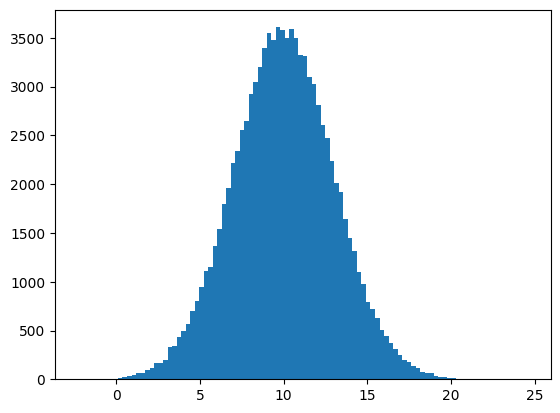

In [10]:
# Visualise data (data = np.random.normal(10.0,3.0,100000)) with a histogram
import matplotlib.pyplot as plt # for visualisation
plt.hist(data, bins=100)
plt.show()

The histogram from our random sample shows a bell shape that indicates that the data is in a normal distribution.
<br> We can furhter demonstrate this by drawing a normal distribution curve overlaying the histogram [1]

###### ref: [1] GeeksforGeeks. (2024, August 5). How to Plot Normal Distribution over Histogram in Python? GeeksforGeeks. https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/

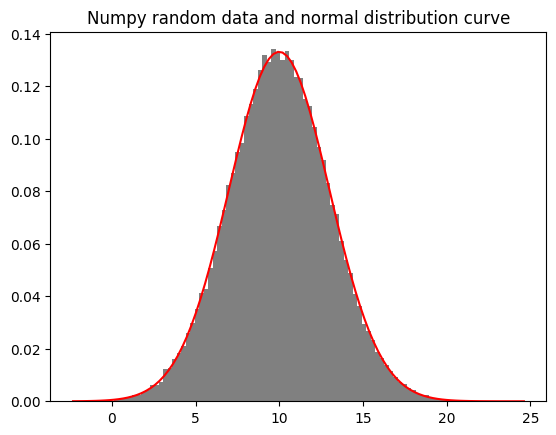

In [11]:
# adapted from lecture notes and geeksforgeeks.org (ref:https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/)
import scipy.stats as stats #for Probability Density Function (PDF)
# Fit a normal distribution to the random data ((data = np.random.normal(10.0,3.0,100000)):

# Plot the histogram of the data with 100 bins, normalize the data (density=True) so it aligns with the curve
plt.hist(data, bins=100, density=True,color='grey')

# Generate values for the x axis, start from minimum to maximum values of the data
x = np.linspace(data.min(), data.max(), 100)
# Calculate the PDF of a normal distribution with the mean and standard deviation of the data
p = stats.norm.pdf(x, data.mean(), data.std())

plt.plot(x, p,"r") # plot the PDF curve
title = "Numpy random data and normal distribution curve"
plt.title(title)
plt.show()

Another possible visual test of normality is the QQ Plot. A QQ plot visually assesses if data follows a normal distribution by comparing quantiles of the data against a theoretical normal distribution. If the points roughly follow a straight line, the data is likely normal.

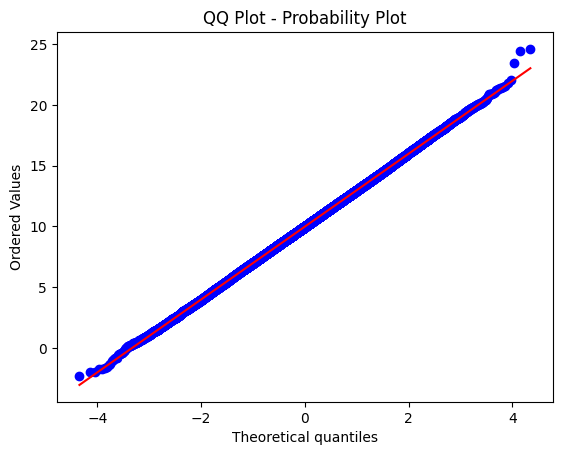

In [12]:
# QQ Plot
#stats.probplot(data, dist='norm', plot=ax)

import scipy.stats as stats

stats.probplot(data, dist="norm", plot=plt)
plt.title("QQ Plot - Probability Plot")
plt.show()